In [1]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [2]:
# converting data into dataf

walmart = pd.read_csv("walmart_data.csv")

In [3]:
# making an copy of the dataset

df = walmart.copy()

In [4]:
# Top 5 rows of the dataframe

df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [5]:
# No of rows & columns

df.shape

(550068, 10)

In [6]:
# Data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [7]:
# Checking of null values

df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [8]:
# Duplicate values check

df.duplicated().sum()

0

In [9]:
# Uniques values of each columns

df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

In [10]:
# Convert all columns (except Purchase) to categorical type in the DataFrame

for _ in df.columns[:-1]:
 df[_] = df[_].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(9), int64(1)
memory usage: 10.3 MB


In [11]:
df.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


In [12]:
df.describe( include = 'category').T

,count,unique,top,freq
User_ID,550068,5891,1001680,1026
Product_ID,550068,3631,P00265242,1880
Gender,550068,2,M,414259
Age,550068,7,26-35,219587
Occupation,550068,21,4,72308
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821
Marital_Status,550068,2,0,324731
Product_Category,550068,20,5,150933


## Outlier detection

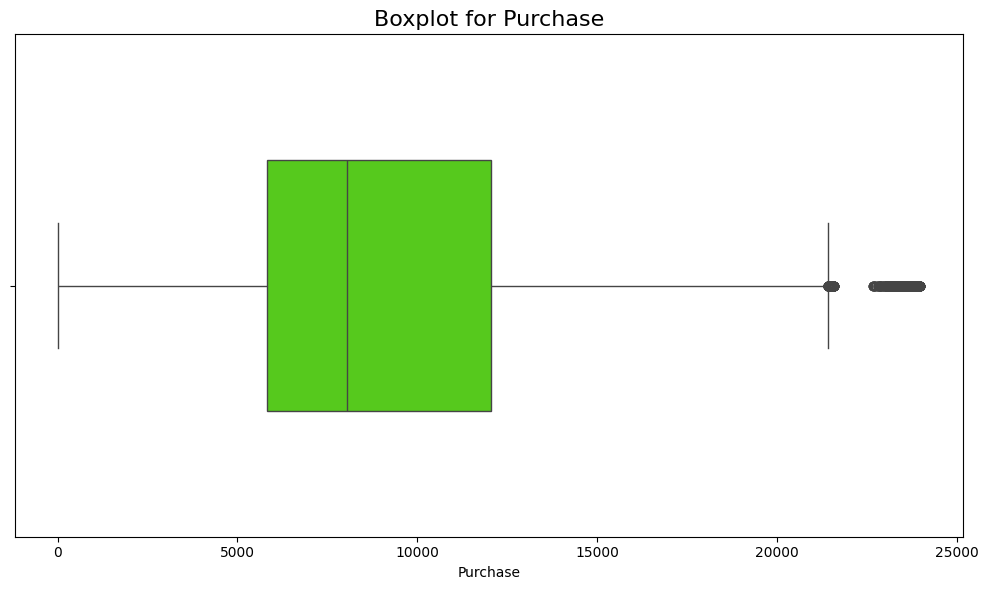

In [13]:
plt.figure(figsize=(10, 6))

# Create a box plot for 'Purchase' 
sns.boxplot(x='Purchase', data=df, color='#4ce600', width=0.5)
plt.title('Boxplot for Purchase', fontsize=16)
plt.tight_layout()
plt.show()

In [14]:
# Calculate quartiles and IQR for the specified column
Q1 = np.percentile(df['Purchase'], 25)
Q3 = np.percentile(df['Purchase'], 75)
IQR = Q3 - Q1

# Upper and lower bounds for outliers
upper_bound = Q3 + (1.5 * IQR)
lower_bound = Q1 - (1.5 * IQR)

# Outliers in the specified column
upper_outliers_df = df[df['Purchase'] > upper_bound]
lower_outliers_df = df[df['Purchase'] < lower_bound]

# Count of outliers
upper_count = len(upper_outliers_df)
lower_count = len(lower_outliers_df)

total_count = upper_count + lower_count

In [15]:
print(f"Upper Outliers Count: {upper_count}")
print(f"Lower Outliers Count: {lower_count}")
print(f"Overall Outliers Count: {total_count}")

Upper Outliers Count: 2677
Lower Outliers Count: 0
Overall Outliers Count: 2677


In [16]:
# Extract rows where 'Purchase' values are greater than the upper bound to identify outliers

outliers_df = df[df['Purchase'] > upper_bound]
outliers_df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
343,1000058,P00117642,M,26-35,2,B,3,0,10,23603
375,1000062,P00119342,F,36-45,3,A,1,0,10,23792
652,1000126,P00087042,M,18-25,9,B,1,0,10,23233
736,1000139,P00159542,F,26-35,20,C,2,0,10,23595
1041,1000175,P00052842,F,26-35,2,B,1,0,10,23341
...,...,...,...,...,...,...,...,...,...,...
544488,1005815,P00116142,M,26-35,20,B,1,0,10,23753
544704,1005847,P00085342,F,18-25,4,B,2,0,10,23724
544743,1005852,P00202242,F,26-35,1,A,0,1,10,23529
545663,1006002,P00116142,M,51-55,0,C,1,1,10,23663


In [17]:
clipped_data = np.clip(df['Purchase'], lower_bound, upper_bound)

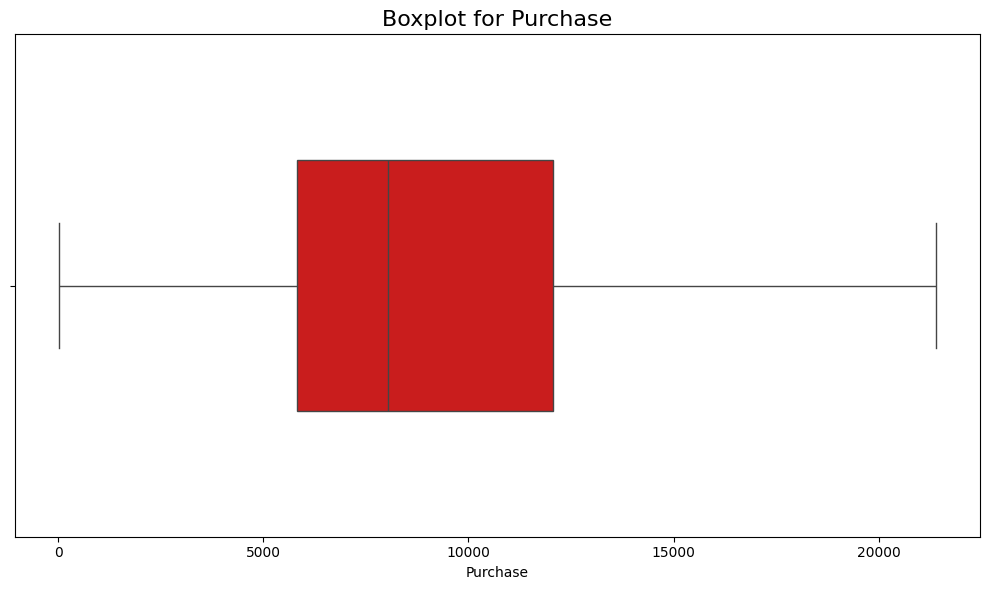

In [18]:
plt.figure(figsize=(10, 6))

# Create a box plot for clipped data
sns.boxplot(x=clipped_data,color='#e60000', width=0.5, orient='h')
plt.title('Boxplot for Purchase', fontsize=16)
plt.tight_layout()
plt.show()

In [19]:
# Map numerical values in 'Marital_Status' to categorical labels\

df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'Married' if x == 1 else 'Single')

In [20]:
df.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Single,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Single,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Single,12,1422


## Univariate Analysis

In [21]:
category = ['Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']

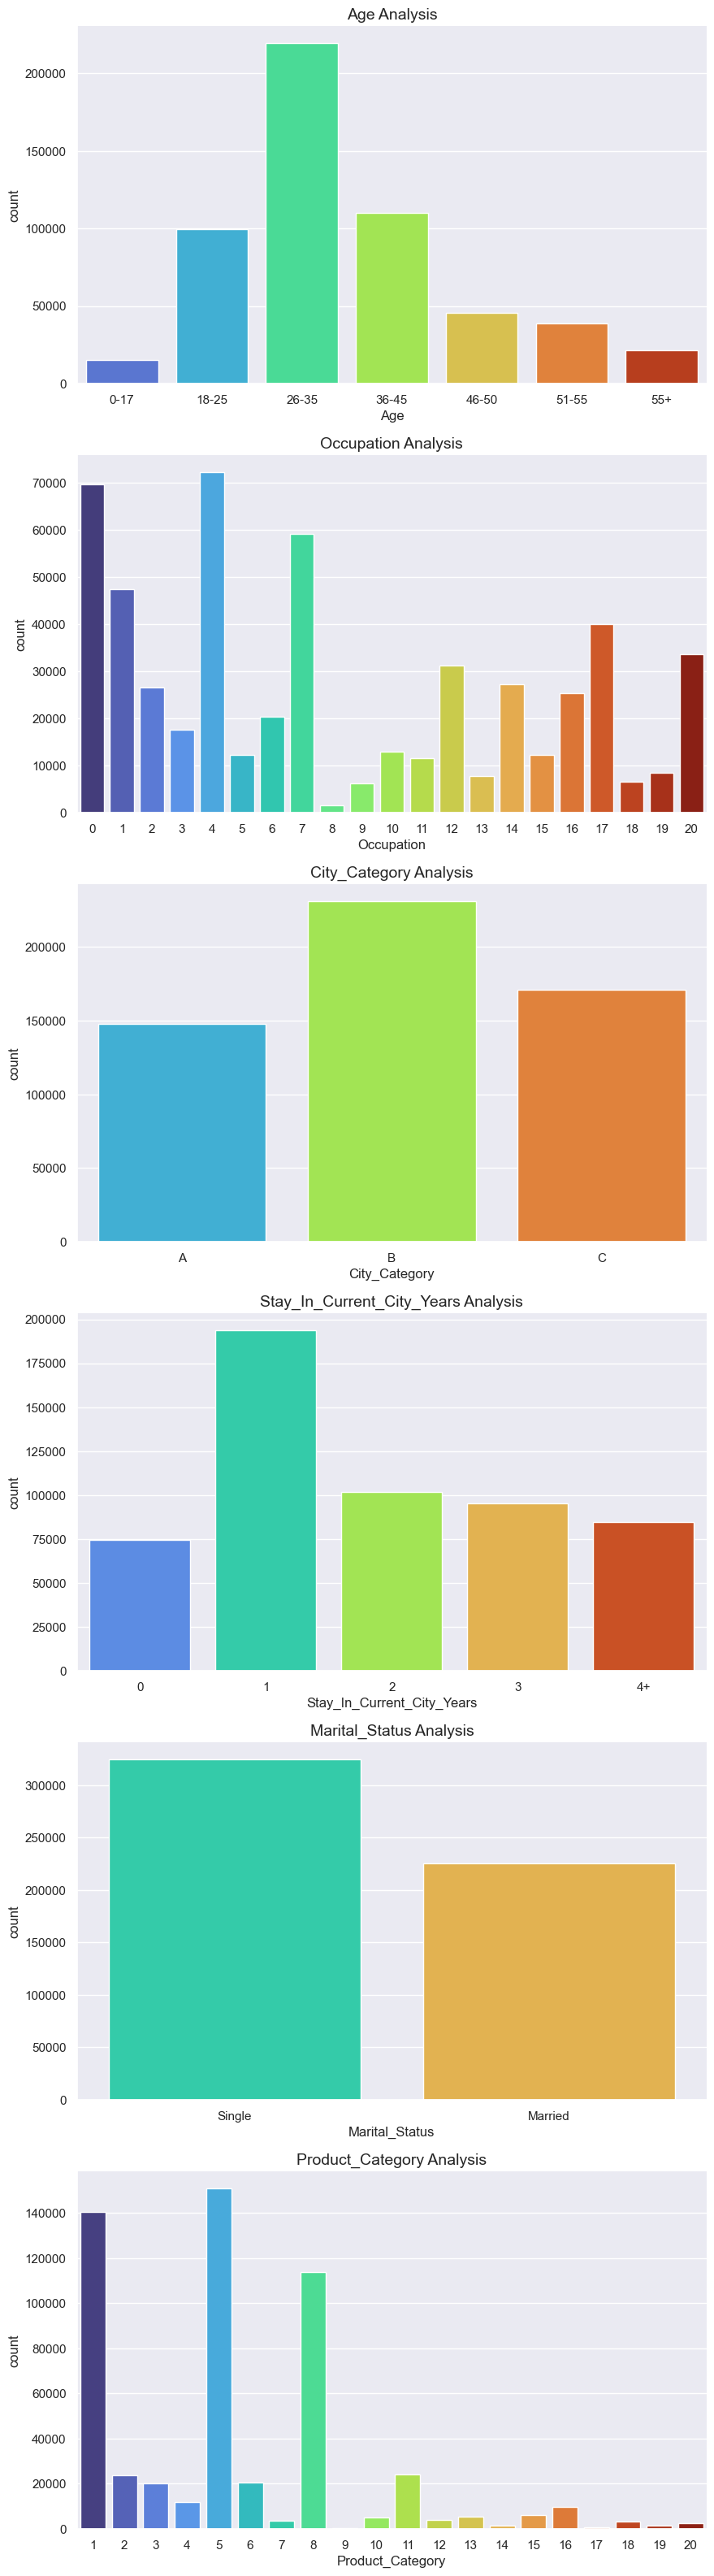

In [22]:
plt.figure(figsize=(10,40))
sns.set(style='darkgrid')

# Plot each categorical column
for i, col in enumerate(category, 1):
    plt.subplot(6, 1, i)
    sns.countplot(data=df, x=col, hue=col, palette='turbo', legend=False)
    sns.despine()
    plt.title(f'{col} Analysis', fontsize=14, fontfamily='sans-serif')

# Show the plot
plt.show()

### Insights:

**Age Group Distribution:**

   - The age group '26-35' has the highest count, indicating that customers in this age range make the most purchases. It is   followed by the age groups '36-45' and '18-25'.

**Occupation Analysis:**

- Occupation '4' has the highest count, suggesting that customers with occupation '4' have the highest representation in the dataset. Occupations '0', '7', and '1' also have significant counts.

**City Category Distribution:**

- City_Category 'B' has the highest count, indicating that customers from City_Category 'B' have made the most purchases. City_Category 'C' and 'A' follow in terms of count.

**Marital Status Impact:**

- Customers with a marital status of 'Single' have a higher count compared to those who are 'Married', suggesting that single individuals make more purchases in the dataset.

**City Residence Duration Impact:**
- Customers who have stayed in their current city for more than 1 year show a higher purchase tendency, suggesting a positive correlation between the duration of stay and purchasing behavior.

**Product Category Purchase Analysis:**
   - Product categories '1' and '5' exhibit higher purchase amounts, indicating that these categories contribute significantly to the overall sales revenue.

## Bivariate Analysis

In [23]:
pivot = lambda index: df.pivot_table(index=df[index], columns='Gender', aggfunc='size', fill_value=0)

In [24]:
pivot('Age')

Gender,F,M
Age,,
0-17,5083,10019
18-25,24628,75032
26-35,50752,168835
36-45,27170,82843
46-50,13199,32502
51-55,9894,28607
55+,5083,16421


In [25]:
pivot('Occupation')

Gender,F,M
Occupation,,
0,18112,51526
1,17984,29442
2,8629,17959
3,7919,9731
4,17836,54472
5,2220,9957
6,8160,12195
7,10028,49105
8,361,1185


In [26]:
pivot('City_Category')

Gender,F,M
City_Category,,
A,35704,112016
B,57796,173377
C,42309,128866


In [27]:
pivot('Stay_In_Current_City_Years')

Gender,F,M
Stay_In_Current_City_Years,,
0,17063,57335
1,51298,142523
2,24332,77506
3,24520,70765
4+,18596,66130


In [28]:
pivot('Marital_Status')

Gender,F,M
Marital_Status,,
Single,78821,245910
Married,56988,168349


In [29]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [30]:
pivot('Product_Category')

Gender,F,M
Product_Category,,
1,24831,115547
2,5658,18206
3,6006,14207
4,3639,8114
5,41961,108972
6,4559,15907
7,943,2778
8,33558,80367
9,70,340


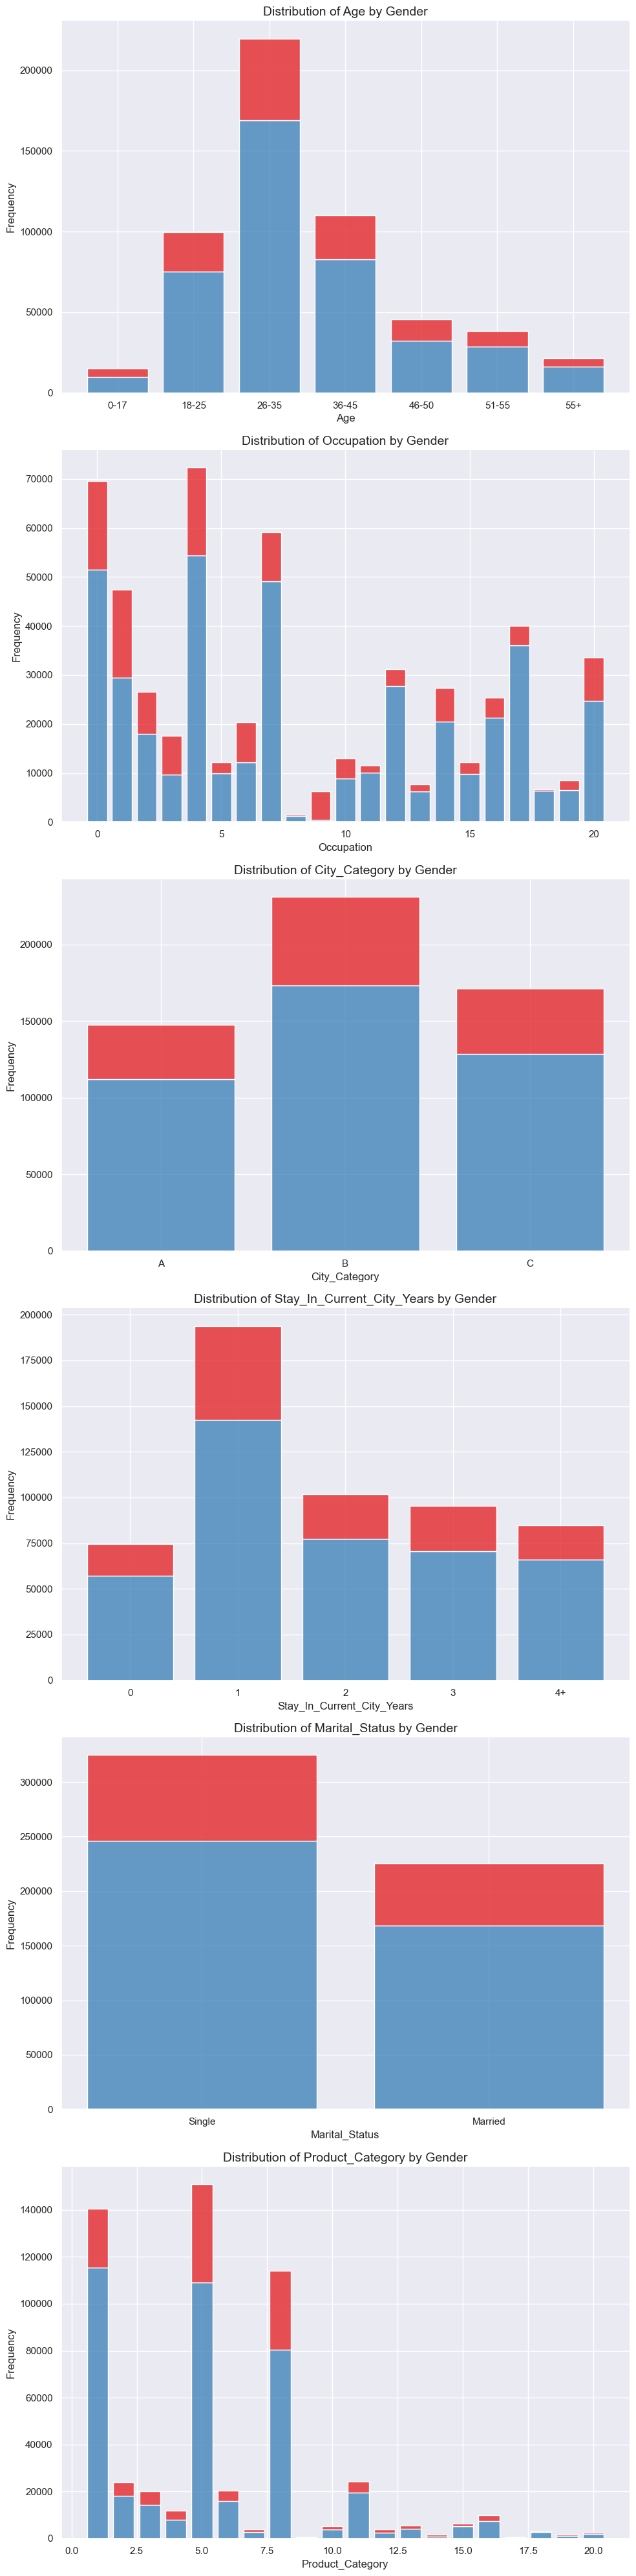

In [31]:
plt.figure(figsize=(10, 40))
sns.set(style='darkgrid')

# Plot each categorical column
for i, col in enumerate(category, 1):
    plt.subplot(6, 1, i)
    sns.histplot(data=df, x=col, hue='Gender', palette='Set1', legend=False, multiple='stack', shrink=0.8)
    sns.despine()
    
    # Set labels and title
    plt.xlabel(f'{col}', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title(f'Distribution of {col} by Gender', fontsize=14, fontfamily='sans-serif')

    plt.tight_layout()

plt.show()

### Insights:

**Gender-Related Purchase Analysis:**
   - Across various age groups, males tend to have higher purchase counts compared to females, with the age group '26-35' showing the most significant difference.
 
**Occupation-Related Purchase Analysis:**
   - Occupations '0' and '4' show the highest purchase counts, suggesting that individuals in these occupations contribute significantly to overall sales, with '4' having notably higher purchases than others.
   
**City Category-Related Purchase Analysis:**
   - City_Category 'B' has the highest purchase counts for both genders, indicating that customers residing in City_Category 'B' contribute significantly to overall sales compared to 'A' and 'C'.
   
**Stay in Current City Duration Impact:**
   - Customers who have stayed in their current city for 1 year exhibit the highest purchase counts, suggesting that individuals with a 1-year residence duration have a higher tendency to make purchases compared to other durations.
   
**Marital Status-Related Purchase Analysis:**
   - Individuals with a marital status of 'Single' have higher purchase counts compared to those who are 'Married', indicating that single individuals contribute more to overall sales.
   
**Product Category-Related Purchase Analysis:**
   - Product Category '1' has the highest purchase counts, indicating that it significantly contributes to overall sales. Product Categories '5' and '8' also show notable purchase counts.

## Multivariate Analysis

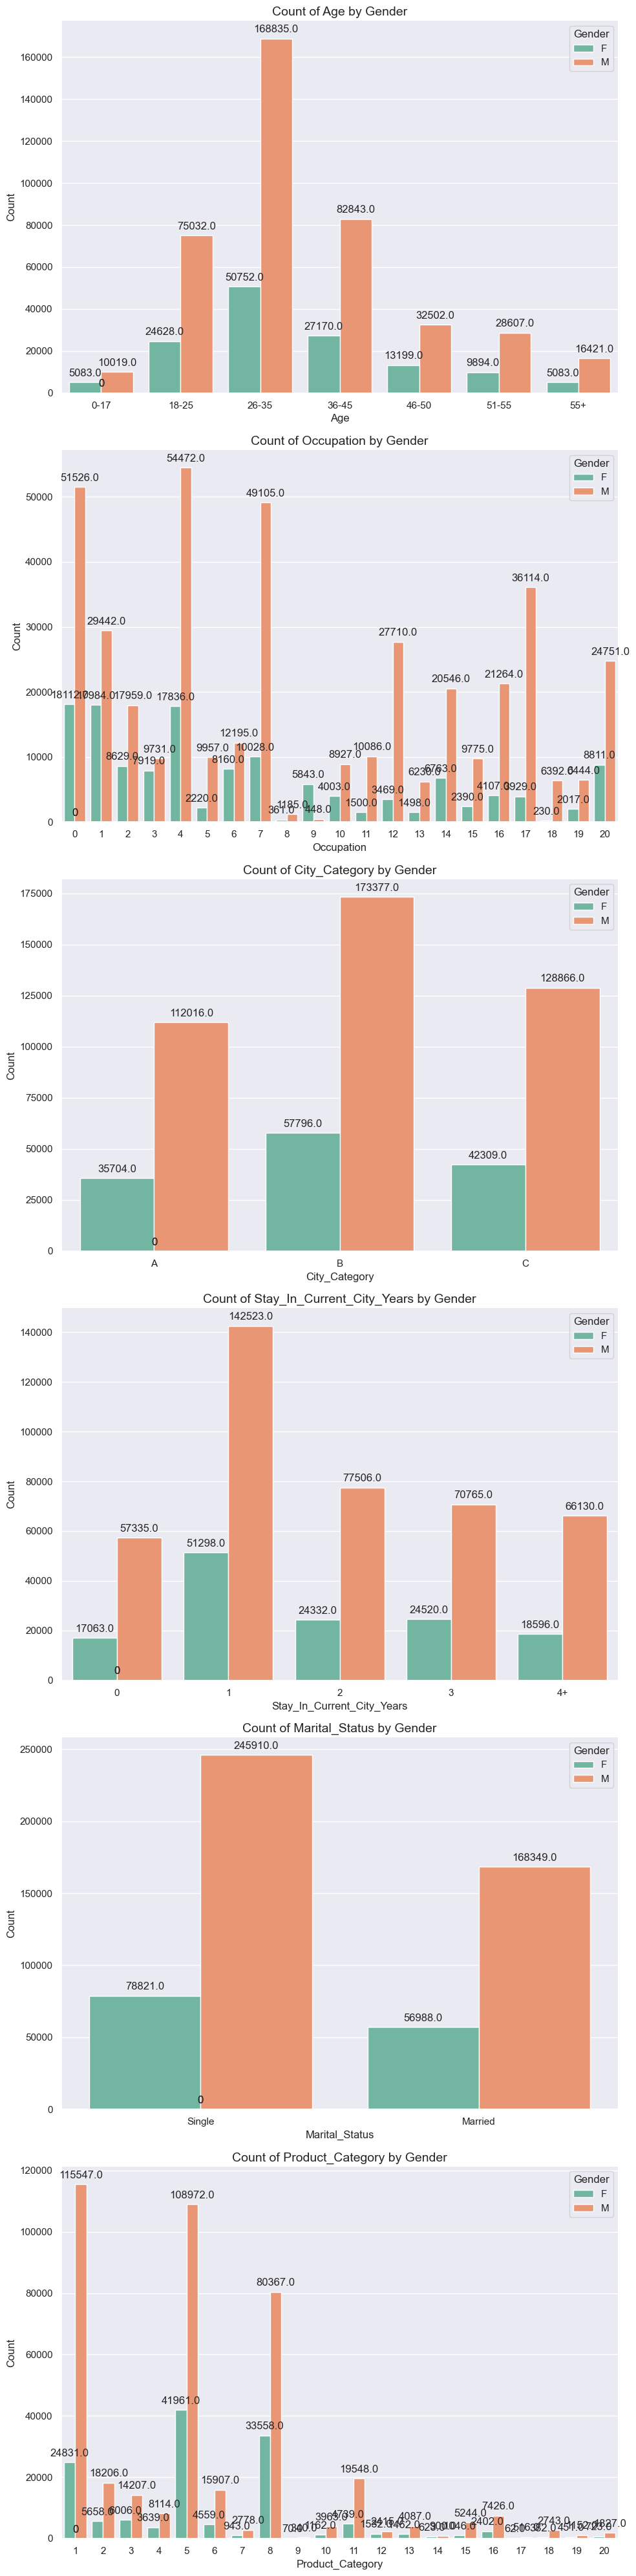

In [32]:
plt.figure(figsize=(10, 40))
sns.set(style='darkgrid')

# Plot each categorical column
for i, col in enumerate(category, 1):
    plt.subplot(6, 1, i)
    ax = sns.countplot(data=df, x=col, hue='Gender', palette='Set2')
    sns.despine()

    plt.title(f'Count of {col} by Gender', fontsize=14, fontfamily='sans-serif')
    plt.xlabel(col)
    plt.ylabel('Count')  

    # Add bar counts as text labels
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}',
                    (p.get_x() + p.get_width() / 2.,
                     p.get_height()),
                    ha='center',
                    va='center',
                    xytext=(0, 10),
                    textcoords='offset points')

    plt.tight_layout()

plt.show()

In [33]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

## Balck friday Sales analysis on gender

In [34]:
avg_purchase = df.groupby('Gender')[['Purchase']].mean().reset_index().round(2)
avg_purchase

,Gender,Purchase
0,F,8734.57
1,M,9437.53


In [35]:
df_male = df[df['Gender']=='M']
df_female = df[df['Gender']=='F']

In [36]:
print(f'Male customers - {len(df_male)}')
print(f'Female customers - {len(df_female)}')

Male customers - 414259
Female customers - 135809


In [37]:
df.groupby('Gender')['Purchase'].describe().T

Gender,F,M
count,135809.000000,414259.00000
mean,8734.565765,9437.52604
std,4767.233289,5092.18621
min,12.000000,12.00000
25%,5433.000000,5863.00000
50%,7914.000000,8098.00000
75%,11400.000000,12454.00000
max,23959.000000,23961.00000


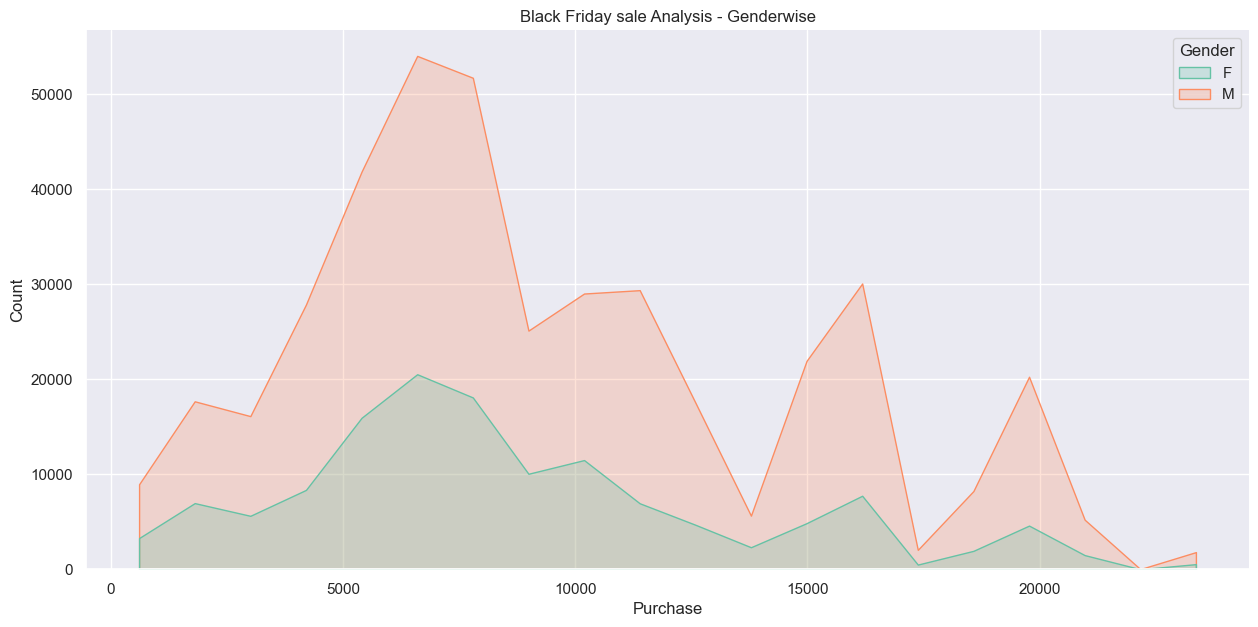

In [38]:
plt.figure(figsize=(15,7))
sns.set(style='darkgrid')
sns.histplot(data=df, x = "Purchase", bins=20, hue = "Gender",element='poly',palette= 'Set2')
sns.despine()
plt.title('Black Friday sale Analysis - Genderwise')
plt.show()

### Insights:

   **Men spent more money than women during the Black Friday sale.**

   - The total number of male customers (4225) exceeds the total number of female customers (1666).

   - The average amount spent by male customers (9437) is higher than the average amount spent by female customers (8734).

   - With a larger male customer base, it is likely that men will make more purchases compared to females.

   - The higher sales among male customers could be attributed to a product range better suited to their preferences, leading to increased sales of products targeted towards men.


In [39]:
# Calculates the 95% confidence interval and width for a specified category within a given variable in the dataset.

def data_ci(data, variable, category, confidence_level=0.95):

    category_data = data[data[variable] == category]['Purchase']
    category_mean = category_data.mean()
    category_std = category_data.std()

    # standard error of the mean
    category_sem = category_std / np.sqrt(len(category_data))

    # margin of error
    category_moe = category_sem * norm.ppf((1 + confidence_level) / 2)

    # confidence interval
    category_ci = (category_mean - category_moe, category_mean + category_moe)

    # width
    category_width = category_ci[1] - category_ci[0]

    print(f'{category} 95% confidence interval: {category_ci}')
    print(f'{category} Width: {category_width}')

In [40]:
# Calculates the 95% confidence interval and width for a specified category within a given variable in a sampled dataset.

def sample_ci(data, variable, category, sample_size):
    
    category_data = data[data[variable] == category]['Purchase']
    sample_data = category_data.sample(n=sample_size, random_state=42)
    mean_val = sample_data.mean()
    std_dev = sample_data.std()

    # standard error of the mean
    sem = std_dev / np.sqrt(sample_size)

    # margin of error
    moe = sem * norm.ppf((1 + 0.95) / 2)  # 1.96 corresponds to the Z-score for a 95% confidence interval

    # confidence interval
    ci = (mean_val - moe, mean_val + moe)
    
    category_width = ci[1] - ci[0]

    print(f"\nSample Size: {sample_size}")
    print(f'{category} 95% confidence interval: {ci}')
    print(f'{category} Width: {category_width}')

## Confidence intervals for the Average amount spent per gender.

### 95% confidence interval of Entire Dataset

In [41]:
data_ci(df, 'Gender', 'M')

M 95% confidence interval: (9422.01944736257, 9453.032633581959)
M Width: 31.013186219388444


In [42]:
data_ci(df, 'Gender', 'F')

F 95% confidence interval: (8709.21154714068, 8759.919983170272)
F Width: 50.70843602959212


### 95% confidence interval of 300 samples

In [43]:
sample_ci(df, 'Gender', 'M', 300)


Sample Size: 300
M 95% confidence interval: (9283.731565877591, 10491.715100789075)
M Width: 1207.9835349114837


In [44]:
sample_ci(df, 'Gender', 'F', 300)


Sample Size: 300
F 95% confidence interval: (8308.865304074718, 9426.034695925284)
F Width: 1117.1693918505662


### 95% confidence interval of 3000 samples

In [45]:
sample_ci(df, 'Gender', 'M', 3000)


Sample Size: 3000
M 95% confidence interval: (9460.10182838994, 9831.170171610062)
M Width: 371.0683432201222


In [46]:
sample_ci(df, 'Gender', 'F', 3000)


Sample Size: 3000
F 95% confidence interval: (8630.48138780842, 8982.545945524911)
F Width: 352.0645577164905


### 95% confidence interval of 30000 samples

In [47]:
sample_ci(df, 'Gender', 'M', 30000)


Sample Size: 30000
M 95% confidence interval: (9428.950211018666, 9544.881322314668)
M Width: 115.9311112960022


In [48]:
sample_ci(df, 'Gender', 'M', 30000)


Sample Size: 30000
M 95% confidence interval: (9428.950211018666, 9544.881322314668)
M Width: 115.9311112960022


### Insights:

- The confidence interval computed using the entire dataset is wider for males compared to females, indicating higher variability in the amount spent by males.

- The width of the confidence interval is inversely affected by the sample size; as the sample size increases, the interval becomes narrower, providing more precise estimates.

- The confidence intervals for different sample sizes overlap, suggesting that observed differences may not be statistically significant.

- Larger sample sizes result in more normally shaped distributions of means due to the Central Limit Theorem.


## Confidence intervals for the average amount spent per Marital_Status.

### 95% confidence interval of Entire Dataset

In [49]:
data_ci(df, 'Marital_Status', 'Married')

Married 95% confidence interval: (9240.460427057078, 9281.888721107669)
Married Width: 41.42829405059092


In [50]:
data_ci(df, 'Marital_Status', 'Single')

Single 95% confidence interval: (9248.61641818668, 9283.198819656332)
Single Width: 34.58240146965181


### 95% confidence interval of 300 samples

In [51]:
sample_ci(df, 'Marital_Status', 'Married', 300)


Sample Size: 300
Married 95% confidence interval: (8887.305881933493, 10041.72745139984)
Married Width: 1154.4215694663471


In [52]:
sample_ci(df, 'Marital_Status', 'Single', 300)


Sample Size: 300
Single 95% confidence interval: (9051.928693931213, 10213.504639402121)
Single Width: 1161.5759454709078


### 95% confidence interval of 3000 samples

In [53]:
sample_ci(df, 'Marital_Status', 'Married', 3000)


Sample Size: 3000
Married 95% confidence interval: (9118.562018709765, 9482.974647956902)
Married Width: 364.4126292471374


In [54]:
sample_ci(df, 'Marital_Status', 'Single', 3000)


Sample Size: 3000
Single 95% confidence interval: (9246.175079645862, 9612.375587020804)
Single Width: 366.2005073749424


### 95% confidence interval of 30000 samples

In [55]:
sample_ci(df, 'Marital_Status', 'Married', 30000)


Sample Size: 30000
Married 95% confidence interval: (9198.156166015178, 9312.029900651487)
Married Width: 113.87373463630865


In [56]:
sample_ci(df, 'Marital_Status', 'Single', 30000)


Sample Size: 30000
Single 95% confidence interval: (9229.816006946752, 9343.573126386582)
Single Width: 113.7571194398297


### Insights:


- The confidence interval for the 'Married' group is wider than that for the 'Single' group, indicating higher variability in the amount spent for married individuals.

- The width of the confidence interval decreases as the sample size increases, showcasing the impact of larger sample sizes on precision.

- Yes, the confidence intervals for 'Married' and 'Single' groups overlap, suggesting that observed differences may not be statistically significant across sample sizes.

- As the sample size increases, the width of the confidence interval decreases, leading to a more precise estimate of the mean and resulting in a more normal distribution of sample means.


## Confidence intervals for the average amount spent per City_Category.

### 95% confidence interval of Entire Dataset

In [57]:
data_ci(df, 'City_Category', 'A')

A 95% confidence interval: (8886.991825864907, 8936.88660630406)
A Width: 49.89478043915369


In [58]:
data_ci(df, 'City_Category', 'B')

B 95% confidence interval: (9131.099848963764, 9171.501276600207)
B Width: 40.40142763644326


In [59]:
data_ci(df, 'City_Category', 'C')

C 95% confidence interval: (9695.337107885243, 9744.504878386117)
C Width: 49.1677705008733


## 95% confidence interval of 300 samples

In [60]:
sample_ci(df, 'City_Category', 'A', 300)


Sample Size: 300
A 95% confidence interval: (8098.995845827299, 9266.9641541727)
A Width: 1167.968308345401


In [61]:
sample_ci(df, 'City_Category', 'B', 300)


Sample Size: 300
B 95% confidence interval: (8571.45829896875, 9684.755034364583)
B Width: 1113.2967353958338


In [62]:
sample_ci(df, 'City_Category', 'C', 300)


Sample Size: 300
C 95% confidence interval: (8630.994793994194, 9728.831872672474)
C Width: 1097.8370786782798


## 95% confidence interval of 3000 samples

In [63]:
sample_ci(df, 'City_Category', 'A', 3000)


Sample Size: 3000
A 95% confidence interval: (8812.739396324683, 9167.82993700865)
A Width: 355.09054068396654


In [64]:
sample_ci(df, 'City_Category', 'B', 3000)


Sample Size: 3000
B 95% confidence interval: (8791.70616073309, 9141.478505933577)
B Width: 349.7723452004866


In [65]:
sample_ci(df, 'City_Category', 'C', 3000)


Sample Size: 3000
C 95% confidence interval: (9442.853994951975, 9813.490671714693)
C Width: 370.6366767627187


## 95% confidence interval of 30000 samples

In [66]:
sample_ci(df, 'City_Category', 'A', 30000)


Sample Size: 30000
A 95% confidence interval: (8836.46007218682, 8947.056727813182)
A Width: 110.59665562636292


In [67]:
sample_ci(df, 'City_Category', 'B', 30000)


Sample Size: 30000
B 95% confidence interval: (9079.173984592268, 9191.2066820744)
B Width: 112.03269748213279


In [68]:
sample_ci(df, 'City_Category', 'C', 30000)


Sample Size: 30000
C 95% confidence interval: (9656.973563549582, 9774.566303117084)
C Width: 117.59273956750258


### Insights:

   - The confidence interval for City Category C is wider than others, indicating higher variability in the entire dataset for City Category C.

   - Generally, as sample size increases, the width of confidence intervals decreases. This is evident in the decreasing width for all city categories (A, B, C) with increasing sample size.


   - Yes, the confidence intervals for different sample sizes overlap, suggesting no significant differences in means between sample sizes.

   - Larger sample sizes result in narrower confidence intervals, indicating a more precise estimate of the mean and a more normal distribution due to the Central Limit Theorem.


# Business Recommendations:

1. **Targeted Marketing for Age Group '26-35':**
   - Focus marketing efforts on individuals in the age group '26-35', as they demonstrate the highest purchase counts. Tailor promotions and advertisements to resonate with this demographic.<br><br>

2. **Occupation-Based Product Offerings:**
   - Since Occupation '4' has the highest representation and notable purchases, consider customizing product offerings or promotions to cater specifically to individuals in this occupation.<br><br>

3. **Strategic City_Category 'B' Promotions:**
   - Allocate promotional resources strategically, with a focus on City_Category 'B' where the highest purchases are observed. Tailor promotions to resonate with the preferences of customers in this category.<br><br>

4. **Targeted Campaigns for Singles:**
   - Launch targeted marketing campaigns for individuals with a marital status of 'Single', as they contribute significantly more to overall sales. Understand and appeal to the preferences of this demographic.<br><br>

5. **Encourage Long-Term Residency:**
   - Develop strategies to encourage customers to stay in their current city for more than 1 year. Consider loyalty programs or special incentives for long-term residents to enhance their purchasing tendency.<br><br>

6. **Product Category Optimization:**
   - Optimize the inventory and promotion of products in categories '1' and '5', as they exhibit higher purchase amounts. Strategically manage these categories to maximize overall sales revenue.<br><br>

7. **Gender-Targeted Marketing Strategies:**
   - Implement gender-targeted marketing strategies, especially focusing on males across various age groups. Leverage insights from the age-based gender analysis to tailor promotions effectively.<br><br>

8. **Occupation-Driven Promotions:**
   - Design promotions or incentives based on the top occupations, such as '0' and '4', to further boost sales from these occupational groups.<br><br>

9. **City_Category 'B' Specific Initiatives:**
   - Consider implementing specific initiatives, offers, or events in City_Category 'B' to capitalize on the higher purchasing behavior observed in this category.<br><br>

10. **Data-Driven Product Development:**
    - Analyze the product preferences of male customers to inform product development. Ensure that the product range aligns with the preferences of the larger male customer base, leading to increased sales.
